
# Contour Demo

Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also the :doc:`contour image example
</gallery/images_contours_and_fields/contour_image>`.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

Create a simple contour plot with labels using default colors.  The inline
argument to clabel will control whether the labels are draw over the line
segments of the contour, removing the lines beneath the label.



cs: [Path(array([[-8.01976625e-01, -8.01976625e-01],
       [-8.06529926e-01, -8.06529926e-01],
       [-8.10237266e-01, -8.10237266e-01],
       [-8.13108935e-01, -8.13108935e-01],
       [-8.15151533e-01, -8.15151533e-01],
       [-8.16367957e-01, -8.16367957e-01],
       [-8.16757366e-01, -8.16757366e-01],
       [-8.16315121e-01, -8.16315121e-01],
       [-8.15032678e-01, -8.15032678e-01],
       [-8.12897454e-01, -8.12897454e-01],
       [-8.09892655e-01, -8.09892655e-01],
       [-8.05997059e-01, -8.05997059e-01],
       [-8.01184755e-01, -8.01184755e-01],
       [-8.00000000e-01, -8.00000000e-01],
       [-7.95436910e-01, -7.95436910e-01],
       [-7.88707023e-01, -7.88707023e-01],
       [-7.80948153e-01, -7.80948153e-01],
       [-7.75000000e-01, -7.75000000e-01],
       [-7.72106403e-01, -7.72106403e-01],
       [-7.62113129e-01, -7.62113129e-01],
       [-7.50906376e-01, -7.50906376e-01],
       [-7.50000000e-01, -7.50000000e-01],
       [-7.38339469e-01, -7.38339469e-01],
 

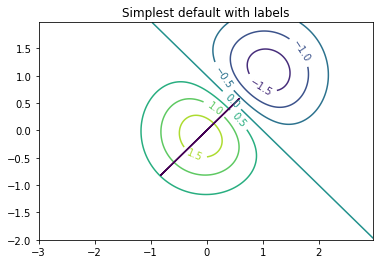

In [10]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')
cs = plt.contour(Y,Y,Z, [1.0])
print('cs:',cs.collections[0].get_paths())

Contour labels can be placed manually by providing list of positions (in data
coordinate).  See :doc:`/gallery/event_handling/ginput_manual_clabel_sgskip`
for interactive placement.

In [ ]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
manual_locations = [
    (-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
ax.clabel(CS, inline=True, fontsize=10, manual=manual_locations)
ax.set_title('labels at selected locations')

You can force all the contours to be the same color.



In [ ]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 6, colors='k')  # Negative contours default to dashed.
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title('Single color - negative contours dashed')

You can set negative contours to be solid instead of dashed:



In [ ]:
plt.rcParams['contour.negative_linestyle'] = 'solid'
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 6, colors='k')  # Negative contours default to dashed.
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title('Single color - negative contours solid')

And you can manually specify the colors of the contour



In [ ]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 6,
                linewidths=np.arange(.5, 4, .5),
                colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5'),
                )
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title('Crazy lines')

Or you can use a colormap to specify the colors; the default
colormap will be used for the contour lines



In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
               cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = ax.contour(Z, levels, origin='lower', cmap='flag', extend='both',
                linewidths=2, extent=(-3, 3, -2, 2))

# Thicken the zero contour.
lws = np.resize(CS.get_linewidth(), len(levels))
lws[6] = 4
CS.set_linewidth(lws)

ax.clabel(CS, levels[1::2],  # label every second level
          inline=True, fmt='%1.1f', fontsize=14)

# make a colorbar for the contour lines
CB = fig.colorbar(CS, shrink=0.8)

ax.set_title('Lines with colorbar')

# We can still add a colorbar for the image, too.
CBI = fig.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = ax.get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.show()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.axes.Axes.contour` / `matplotlib.pyplot.contour`
   - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
   - `matplotlib.axes.Axes.clabel` / `matplotlib.pyplot.clabel`
   - `matplotlib.axes.Axes.get_position`
   - `matplotlib.axes.Axes.set_position`

